<a href="https://colab.research.google.com/github/Elias-Andre/Project_RNA/blob/main/Project_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

from torchvision.datasets import MNIST
from torchvision import transforms

transform = transforms.ToTensor()
trainset = datasets.MNIST('./', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

--2024-05-19 03:20:05--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2024-05-19 03:20:05--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [           <=>      ]  33.20M  13.1MB/s    in 2.5s    

2024-05-19 03:20:08 (13.1 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/tra

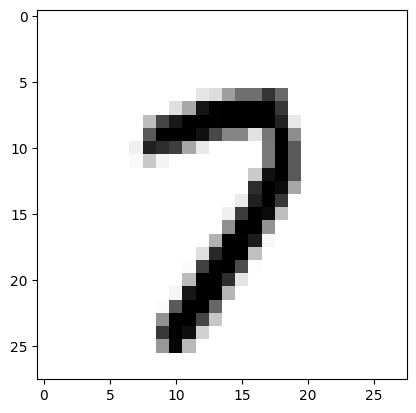

In [ ]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [ ]:
print(imagens[0].shape) #tensor dimension
print(etiquetas[0].shape)

torch.Size([1, 28, 28])
torch.Size([])


In [ ]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28*28, 128) #entrada, 784 (28*28) neuronios ligam a 128
    self.linear2 = nn.Linear(128, 64) #inner layer 1, 128 liga em 64
    self.linear3 = nn.Linear(64, 10) #inner layer 2, 64 liga em 10

  def forward(self,X):
    X = F.relu(self.linear1(X)) #activation function layer "in" to inner layer 1
    X = F.relu(self.linear2(X)) #activation function inner layer 1 to inner layer 2
    X = self.linear3(X) #activation function inner layer 2 to "out"
    return F.log_softmax(X, dim=1) #loss calculation

In [ ]:
def treino(Modelo, trainloader, device):

  otimizador = optim.SGD(Modelo.parameters(), lr=0.01, momentum=0.5) #update policy
  inicio = time() #train timer

  criterio = nn.NLLLoss() #loss criteria
  EPOCHS = 30 #Epochs count
  modelo.train() #Train activation

  for epoch in range(EPOCHS):
    perda_acumulada = 0 #acumulate loss initialization

    for imagens, etiquetas in trainloader:
        imagens = imagens.view(imagens.shape[0], -1) #Img to vetor conversion
        otimizador.zero_grad() #Zero Grad

        output = modelo(imagens.to(device)) #data in model
        perda_instantanea = criterio(output, etiquetas.to(device)) #epoch loss calculation

        perda_instantanea.backward() #back propagation from loss
        otimizador.step() #weight and bias update
        perda_acumulada += perda_instantanea.item() #acumulate loss update

    else:
      print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
      print("\n Tempo de treino (em minutos) =", (time()-inicio)/60)


In [ ]:
def validacao(Modelo, valloader, device):
  conta_corretas, conta_todas = 0,0
  for imagens, etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1,784)
      with torch.no_grad():
        logps = Modelo(img.to(device)) #log scale

      ps = torch.exp(logps)
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab))
      etiqueta_certa = etiquetas.numpy()[i]
      if(etiqueta_certa == etiqueta_pred):
        conta_corretas += 1
      conta_todas += 1
  print("Total de imagens testadas =", conta_todas)
  print("\n Precisão do modelo = {}%".format(conta_corretas*100/conta_todas))

In [ ]:
Modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)